In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel data file into a DataFrame
file_path = 'INF2178_A1_data.xlsx'
df = pd.read_excel(file_path)

# Display the first 5 rows of the df
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [81]:
# Display a summary of different characteristics
df.describe()

,OCCUPANCY_DATE,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,2021-06-29 13:31:57.022612992,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598
min,2021-01-01 00:00:00,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021-03-30 00:00:00,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,2021-06-28 00:00:00,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,2021-09-29 00:00:00,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,2021-12-31 00:00:00,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000
std,NaN,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954


In [24]:

# Make sure the OCCUPANCY_DATE column is in a datetime format
#df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

# Add a month column to each of the date and change the value fro
#df['MONTH'] = df['OCCUPANCY_DATE'].dt.month

In [82]:
# Create a new data frame to only include columns we want to study: OCCUPANCY_DATE, PROGRAM_MODEL, 
# SERVICE_USER_COUNT, CAPACITY_TYPE, CAPACITY_ACTUAL_BED, OCCUPIED_BEDS, CAPACITY_ACTUAL_ROOM, OCCUPIED_ROOMS
columns_to_include = [
    'OCCUPANCY_DATE', 
    'PROGRAM_MODEL', 
    'SERVICE_USER_COUNT', 
    'CAPACITY_TYPE', 
    'CAPACITY_ACTUAL_BED', 
    'OCCUPIED_BEDS', 
    'CAPACITY_ACTUAL_ROOM', 
    'OCCUPIED_ROOMS'
]
df_for_analysis = df[columns_to_include]
df_for_analysis.describe()

,OCCUPANCY_DATE,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,2021-06-29 13:31:57.022612992,45.727171,31.627149,29.780271,55.549259,52.798598
min,2021-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021-03-30 00:00:00,15.000000,15.000000,14.000000,19.000000,16.000000
50%,2021-06-28 00:00:00,28.000000,25.000000,23.000000,35.000000,34.000000
75%,2021-09-29 00:00:00,51.000000,43.000000,41.000000,68.000000,66.000000
max,2021-12-31 00:00:00,339.000000,234.000000,234.000000,268.000000,268.000000
std,NaN,53.326049,27.127682,26.379416,59.448805,58.792954


In [83]:
# Define a function to calculate and record the occupancy rate for bed based capacity and room based capacity

def add_occupancy_rates(row):
    if row['CAPACITY_TYPE'] == 'Bed Based Capacity':
        if row['CAPACITY_ACTUAL_BED'] != 0: # Check if the data is missing
            return (row['OCCUPIED_BEDS'] / row['CAPACITY_ACTUAL_BED']) * 100
        else:
            return 0
    elif row['CAPACITY_TYPE'] == 'Room Based Capacity':
        if row['CAPACITY_ACTUAL_ROOM'] != 0:  # Check if the data is missing
            return (row['OCCUPIED_ROOMS'] / row['CAPACITY_ACTUAL_ROOM']) * 100
        else:
            return 0
    else:
        return None 
# Apply the function to each row of the DataFrame to create a new column 'OCCUPANCY_RATE'
df_for_analysis['OCCUPANCY_RATE'] = df_for_analysis.apply(add_occupancy_rates, axis=1)
df_for_analysis.describe().round(2)

/tmp/ipykernel_89/1137998559.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis['OCCUPANCY_RATE'] = df_for_analysis.apply(add_occupancy_rates, axis=1)


,OCCUPANCY_DATE,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
count,50944,50944.00,32399.00,32399.00,18545.00,18545.00,50944.00
mean,2021-06-29 13:31:57.022612992,45.73,31.63,29.78,55.55,52.80,93.01
min,2021-01-01 00:00:00,1.00,1.00,1.00,1.00,1.00,1.20
25%,2021-03-30 00:00:00,15.00,15.00,14.00,19.00,16.00,92.31
50%,2021-06-28 00:00:00,28.00,25.00,23.00,35.00,34.00,100.00
75%,2021-09-29 00:00:00,51.00,43.00,41.00,68.00,66.00,100.00
max,2021-12-31 00:00:00,339.00,234.00,234.00,268.00,268.00,101.41
std,NaN,53.33,27.13,26.38,59.45,58.79,13.88


In [84]:

# Add a MONTH column to transfer each date to the correspondent month
df_for_analysis['OCCUPANCY_DATE'] = pd.to_datetime(df_for_analysis['OCCUPANCY_DATE'])
df_for_analysis['MONTH'] = df_for_analysis['OCCUPANCY_DATE'].dt.to_period('M')

/tmp/ipykernel_89/2082370016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis['OCCUPANCY_DATE'] = pd.to_datetime(df_for_analysis['OCCUPANCY_DATE'])
/tmp/ipykernel_89/2082370016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis['MONTH'] = df_for_analysis['OCCUPANCY_DATE'].dt.to_period('M')


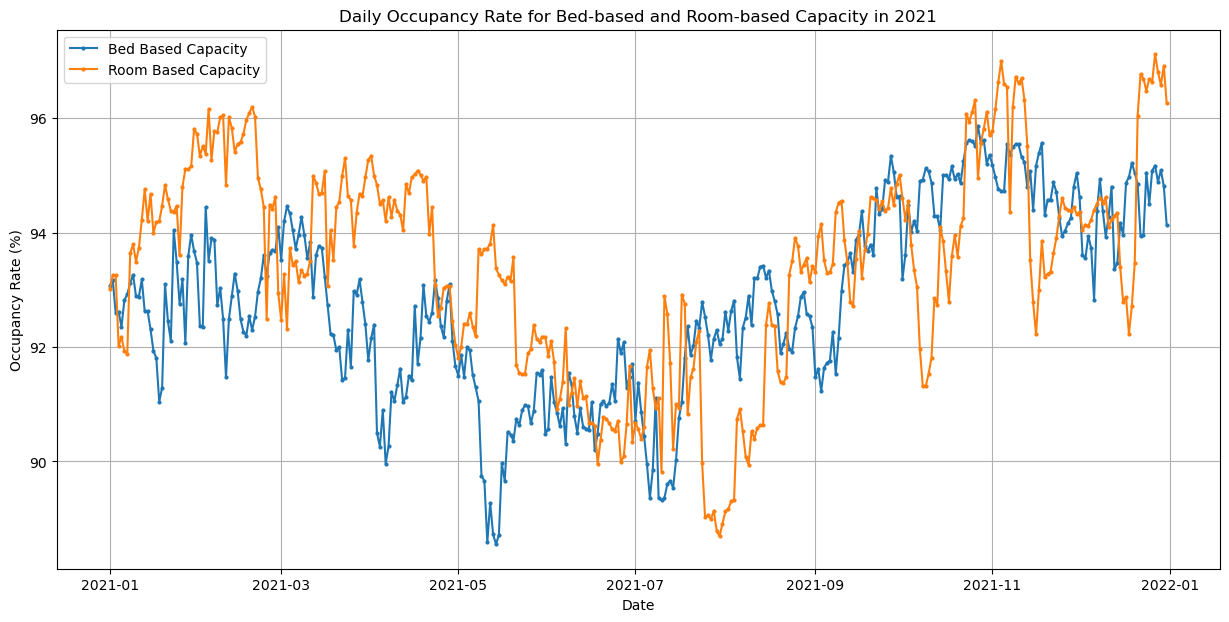

In [85]:
# Create a new data frame to only contain daily mean occupancy rate, different occupancy types, and 
# Draw a line chart to show the daily trend of the occupancy rate for each capacity type

# Aggregate the data to get a daily mean occupancy rate for each capacity type
daily_mean = df_for_analysis.groupby(['OCCUPANCY_DATE', 'CAPACITY_TYPE'])['OCCUPANCY_RATE'].mean().reset_index()

# Create separate DataFrames for each capacity type again
bed_based_daily_mean = daily_mean[daily_mean['CAPACITY_TYPE'] == 'Bed Based Capacity']
room_based_daily_mean = daily_mean[daily_mean['CAPACITY_TYPE'] == 'Room Based Capacity']

# Plot a line chart for daily occupancy rate for each capacity type
plt.figure(figsize=(15, 7)) 

# Plot bed-based capacity trend
plt.plot(bed_based_daily_mean['OCCUPANCY_DATE'], bed_based_daily_mean['OCCUPANCY_RATE'], label='Bed Based Capacity', linestyle='-', marker='o', markersize=2)

# Plot room-based capacity trend
plt.plot(room_based_daily_mean['OCCUPANCY_DATE'], room_based_daily_mean['OCCUPANCY_RATE'], label='Room Based Capacity', linestyle='-', marker='o', markersize=2)

# Customize the chart
plt.title('Daily Occupancy Rate for Bed-based and Room-based Capacity in 2021')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()

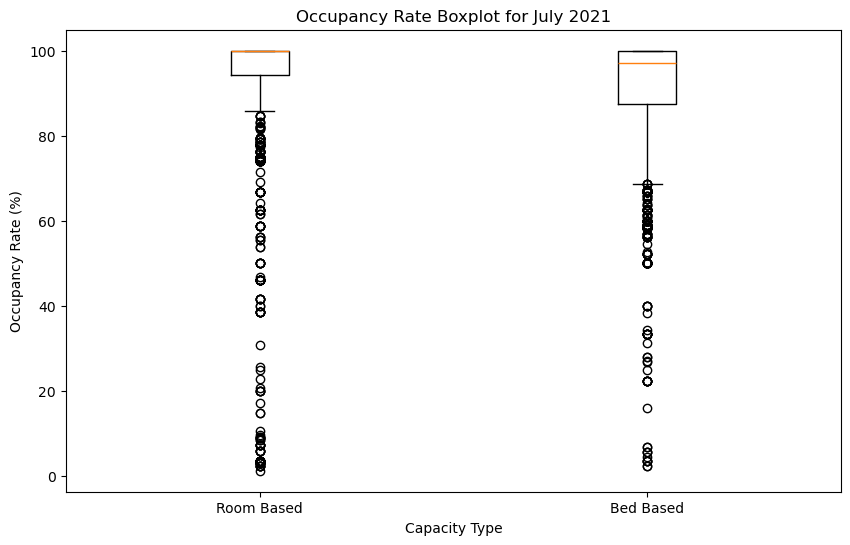

In [93]:
# Create the boxplot for Room based mean occupancy rate and bed based mean occupancy rate in June, 2021

# Filter data for different capacity types
room_based_july = df_for_analysis[(df_for_analysis['MONTH'] == '2021-07') & (df_for_analysis['CAPACITY_TYPE'] == 'Room Based Capacity')]
bed_based_july = df_for_analysis[(df_for_analysis['MONTH'] == '2021-07') & (df_for_analysis['CAPACITY_TYPE'] == 'Bed Based Capacity')]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(
    [room_based_july['OCCUPANCY_RATE'], bed_based_july['OCCUPANCY_RATE']],
    labels=['Room Based', 'Bed Based'],
    showfliers=True )

plt.title('Occupancy Rate Boxplot for July 2021')
plt.xlabel('Capacity Type')
plt.ylabel('Occupancy Rate (%)')

# Show the boxplot
plt.show()



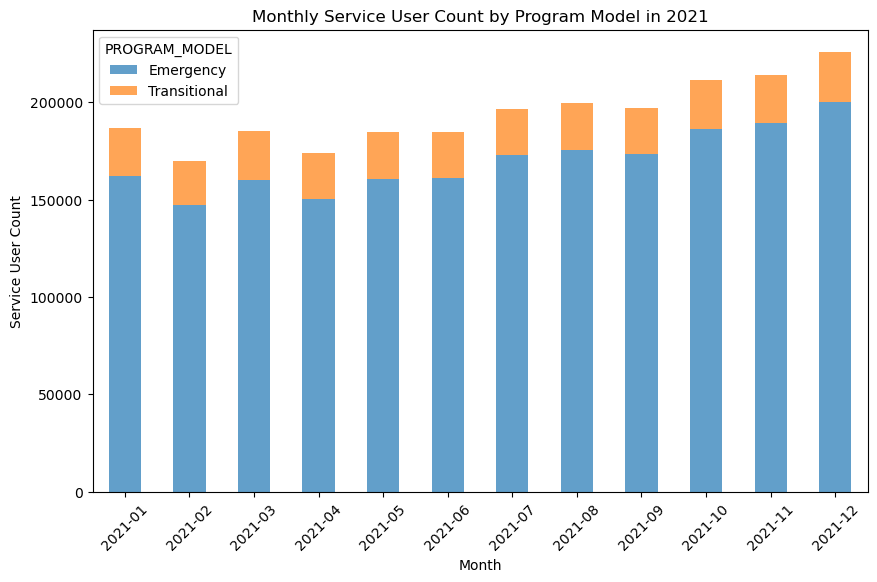

In [86]:
# Generate histograms for the user counts for two program models (emergency and transitional)

# Group user count by month and program model (emergency and transitional)
monthly_user_counts = df_for_analysis.groupby(['MONTH', 'PROGRAM_MODEL'])['SERVICE_USER_COUNT'].sum().unstack()

# Plot the stacked histogram
monthly_user_counts.plot(kind='bar', stacked=True, alpha=0.7, figsize=(10, 6))


plt.title('Monthly Service User Count by Program Model in 2021')
plt.xlabel('Month')
plt.ylabel('Service User Count')
plt.xticks(rotation=45)  # rotate 45 degree to help reading
plt.show()

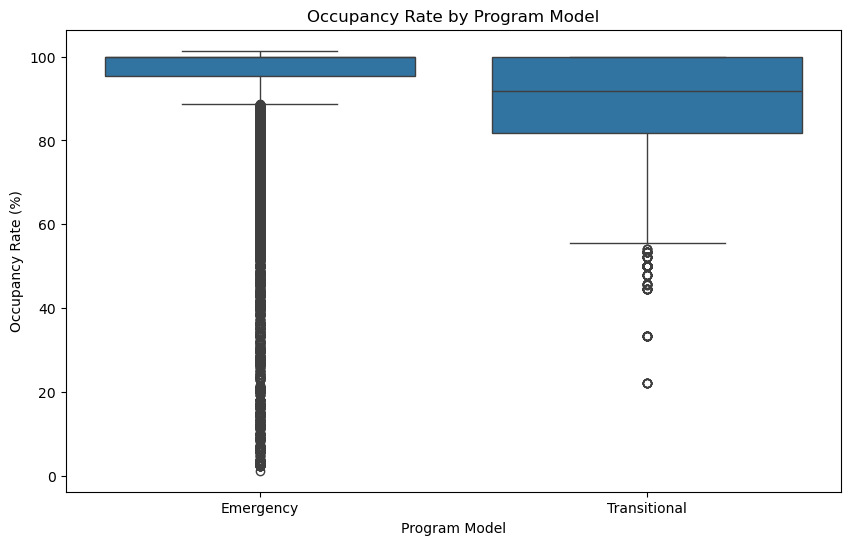

In [87]:
# Create the boxplot to compare occupancy rate by program model
plt.figure(figsize=(10, 6))
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df_for_analysis)

# Customize the chart
plt.title('Occupancy Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate (%)')

# Show the boxplot
plt.show()

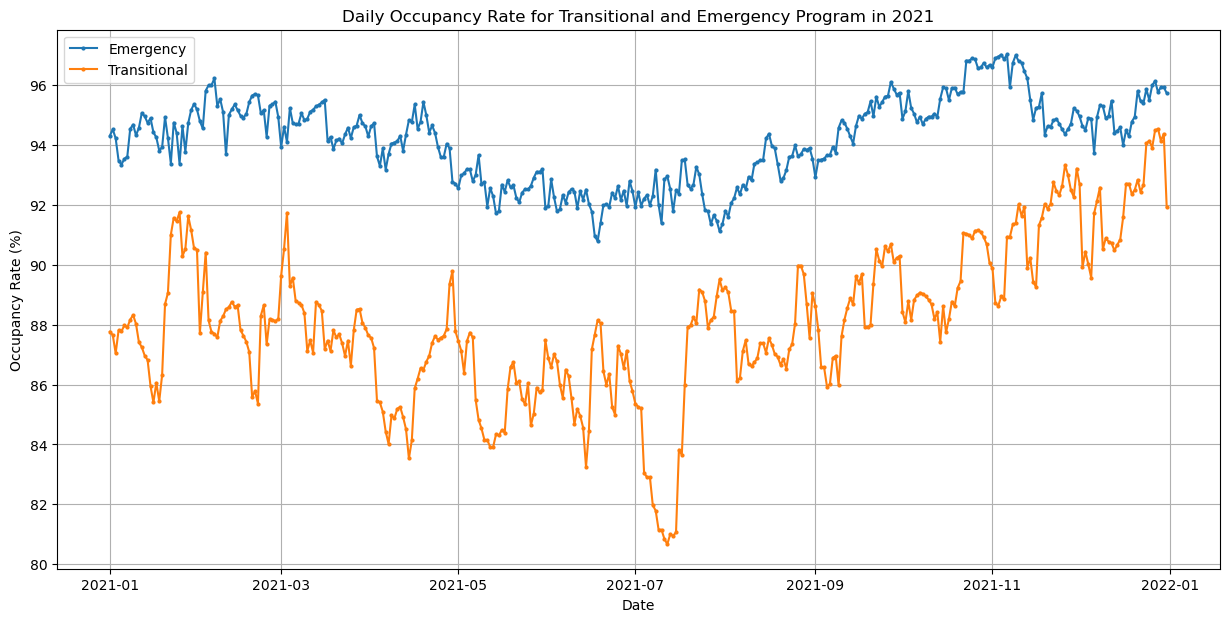

In [96]:
# Create a new data frame to only contain daily mean occupancy rate, different program models, and 
# draw a line chart to show the daily trend of the occupancy rate for each program model

# Aggregate the data to get a daily mean occupancy rate for each program model
daily_mean = df_for_analysis.groupby(['OCCUPANCY_DATE', 'PROGRAM_MODEL'])['OCCUPANCY_RATE'].mean().reset_index()

# Create separate DataFrames for each program model again
emergency_daily_mean = daily_mean[daily_mean['PROGRAM_MODEL'] == 'Emergency']
transitional_daily_mean = daily_mean[daily_mean['PROGRAM_MODEL'] == 'Transitional']

# Plot a line chart for daily occupancy rate for each program model
plt.figure(figsize=(15, 7)) 

# Plot emergency program trend
plt.plot(emergency_daily_mean['OCCUPANCY_DATE'], emergency_daily_mean['OCCUPANCY_RATE'], label='Emergency', linestyle='-', marker='o', markersize=2)

# Plot transitional program trend
plt.plot(transitional_daily_mean['OCCUPANCY_DATE'], transitional_daily_mean['OCCUPANCY_RATE'], label='Transitional', linestyle='-', marker='o', markersize=2)

# Customize the chart
plt.title('Daily Occupancy Rate for Transitional and Emergency Program in 2021')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()

In [89]:
# Perform Welch's t-test to see if there are siginificant difference for two types' occupancy rate

bed_based_occupancy_rate = df_for_analysis[df_for_analysis['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPANCY_RATE']
room_based_occupancy_rate = df_for_analysis[df_for_analysis['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPANCY_RATE']


t_stat, p_value = stats.ttest_ind(bed_based_occupancy_rate, room_based_occupancy_rate, equal_var=False)


print(f"T-statistic: {t_stat},\nP-value: {p_value}")
if p_value < 0.05:
    print("Since P value is less than 0.05, we reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Since P value is greater than 0.05, we do not reject the null hypothesis. There is no significant difference between the means.")

T-statistic: -4.498751771925668,
P-value: 6.860477551486907e-06
Since P value is less than 0.05, we reject the null hypothesis. There is a significant difference between the means.


In [97]:
# Check if the occupancy rate in July are different for the two occupancy types
july_bed_occupancy = df_for_analysis[(df_for_analysis['CAPACITY_TYPE'] == 'Bed Based Capacity') & (df_for_analysis['OCCUPANCY_DATE'].dt.month == 7)]
july_room_occupancy = df_for_analysis[(df_for_analysis['CAPACITY_TYPE'] == 'Room Based Capacity') & (df_for_analysis['OCCUPANCY_DATE'].dt.month == 7)]

# Conduct a two-sample t test to compare the occupancy rate in June for Bed an Room based Capasity
t_stat, p_value = stats.ttest_ind(july_bed_occupancy['OCCUPANCY_RATE'], july_room_occupancy['OCCUPANCY_RATE'], equal_var=False)

print(f"T-statistic: {t_stat},\nP-value: {p_value}")
if p_value < 0.05:
    print("Since P value is less than 0.05, we reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Since P value is greater than 0.05, we do not reject the null hypothesis. There is no significant difference between the means.")

T-statistic: 0.46531783532308363,
P-value: 0.6417462577332036
Since P value is greater than 0.05, we do not reject the null hypothesis. There is no significant difference between the means.


In [91]:
emergency_user = df[df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
transitional_user = df[df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

In [92]:
# Perform Welch's t-test to see if there are siginificant difference for two program models' occupancy rate

emergency_occupancy_rate = df_for_analysis[df_for_analysis['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional_occupancy_rate = df_for_analysis[df_for_analysis['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']


t_stat, p_value = stats.ttest_ind(emergency_occupancy_rate, transitional_occupancy_rate, equal_var=False)


print(f"T-statistic: {t_stat},\nP-value: {p_value}")
if p_value < 0.05:
    print("Since P value is less than 0.05, we reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Since P value is greater than 0.05, we do not reject the null hypothesis. There is no significant difference between the means.")# 

T-statistic: 40.98111537219914,
P-value: 0.0
Since P value is less than 0.05, we reject the null hypothesis. There is a significant difference between the means.
